# Laboratorio 2
Sebastián Cobaise  
Arturo Lazcano

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math as m
import seaborn as sns
import scipy as sp
from sympy import *

In [2]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 398 kB 36.4 MB/s 
  Created wheel for control: filename=control-0.9.2-py2.py3-none-any.whl size=403205 sha256=eeb0c648ad928065ee633c8810eb498828bddb1949b5ef58e335be13f3e8fbd3
  Stored in directory: /root/.cache/pip/wheels/48/ef/c2/929bb5c59a1328df00a0561d0e68cd7c8537f33f5ce0ce741b
Successfully built control


In [3]:
from control import *

# Ejercicio 1

Notamos que $\overrightarrow{X}=\pmatrix{x \\ \dot{x} \\ y \\ \dot{y}}$

# Ejercicio 2

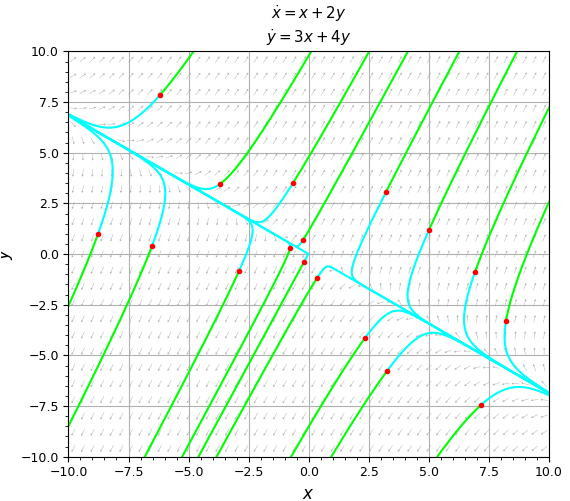

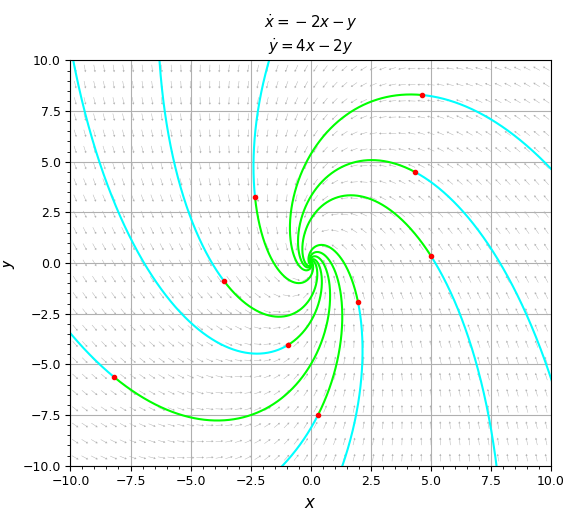

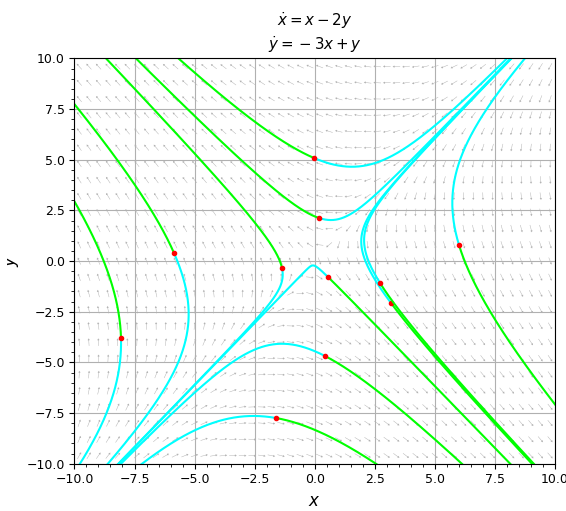

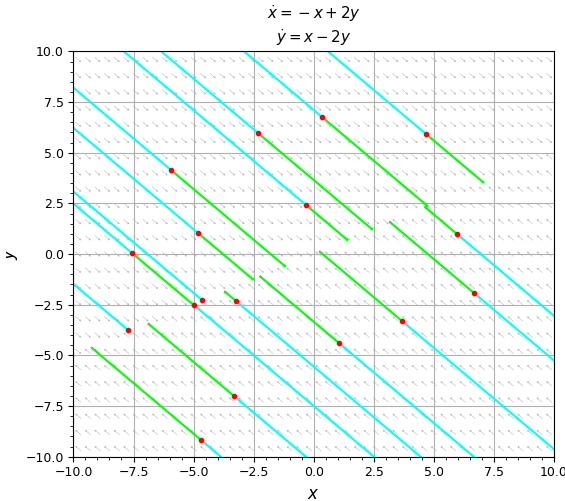

Ahora la función $G$ es lineal, por lo que el sistema queda como:

$\dot{\overrightarrow{X}}=\pmatrix{0 & 1 & 0 & 0\\ \frac{a}{m(t)} & -\frac{\dot{m}(t)}{m(t)} &\frac{b}{m(t)} &0 \\ 0 &0 & 0 &1 \\ \frac{c}{m(t)} & 0 & \frac{d}{m(t)} &-\frac{\dot{m}(t)}{m(t)}}\overrightarrow{X}$

Luego de agregar la variable de control, el sistema queda como

$\dot{\overrightarrow{X}}=\pmatrix{0 & 1 & 0 & 0\\ \frac{a}{m(t)} & -\frac{\dot{m}(t)}{m(t)} &\frac{b}{m(t)} &0 \\ 0 &0 & 0 &1 \\ \frac{c}{m(t)} & 0 & \frac{d}{m(t)} &-\frac{\dot{m}(t)}{m(t)}}\overrightarrow{X}+\pmatrix{0 & 0\\ 1 & 0\\ 0 & 0\\ 0 & 1}\pmatrix{u(t)\\v(t)}$

#Ejercicio 3

In [4]:
# Parámetros a,b,c,d
a1,b1,c1,d1 = -1,-2,4,-5
a2,b2,c2,d2 = -1,0,4,-1

# Masa m=1
m=1

# Matrices A para distintos a,b,c,d
A1=np.array([[0,1,0,0],[a1/m,0,b1/m,0],[0,0,0,1],[c1/m, 0, d1/m,0]])
A2=np.array([[0,1,0,0],[a2/m,0,b2/m,0],[0,0,0,1],[c2/m, 0, d2/m,0]])

# Matriz B
B=np.array([[0,0],[1,0],[0,0],[0,1]])

# Condiciones iniciales
x0_1=np.array([2,3,4,1])
x0_2=np.array([-1,-2,5,-3])
#x0_3=np.array([5,2,-5,-1])

# Definición de controles
def U1(t): # U constante
  return [0.4, 0.4]
def U2(t): # U sinusoidal
  return [np.sin(t), np.sin(t)]
def U3(t): # U feedback lineal 
  C=[[1,1,1,1],[1,0,-1,0]]
  return C
def U4(t): # U bang-bang
  if t<5:
    return [0, 0]
  else:
    return [1, 1]

# Definición de sistemas
def sistema1(t, x): 
  return np.matmul(A1,x) + np.matmul(B,U1(t)) #U1
def sistema2(t, x):
  return np.matmul(A1,x) + np.matmul(B,U2(t)) #U2
def sistema3(t, x):
  return np.matmul(A1+np.matmul(B,U3(t)), x) #U3
def sistema4(t, x):
  return np.matmul(A1,x) + np.matmul(B,U4(t)) #U4
def sistema5(t, x):
  return np.matmul(A2,x) + np.matmul(B,U1(t)) #U1
def sistema6(t, x):
  return np.matmul(A2,x) + np.matmul(B,U2(t)) #U2
def sistema7(t, x):
  return np.matmul(A2,x) + np.matmul(B,np.matmul(U3(t),x)) #U3
def sistema8(t, x):
  return np.matmul(A2,x) + np.matmul(B,U4(t)) #U4

print('A1 = ',A1)
print('\n')
print('A2 = ',A2)

A1 =  [[ 0.  1.  0.  0.]
 [-1.  0. -2.  0.]
 [ 0.  0.  0.  1.]
 [ 4.  0. -5.  0.]]


A2 =  [[ 0.  1.  0.  0.]
 [-1.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 4.  0. -1.  0.]]


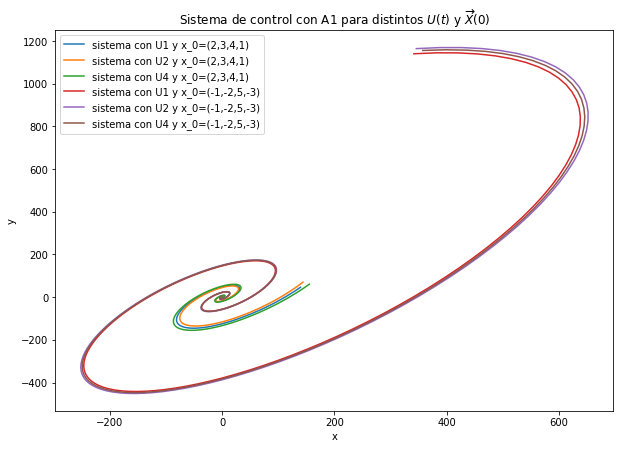

In [ ]:
plt.figure(figsize=(10,7))  
# Resolución y grafico para U1 con valores constantes, x0 = x0_1
sol1 = sp.integrate.solve_ivp(sistema1, t_span=[0, 10], y0=x0_1, dense_output=True)
t = np.linspace(0, 10, 300) # definir tiempo
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U1 y x_0=(2,3,4,1)')

# Resolución y grafico para U2 con valores sinusoidales, x0 = x0_1
sol1 = sp.integrate.solve_ivp(sistema2, t_span=[0, 10], y0=x0_1, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U2 y x_0=(2,3,4,1)')

# Resolución y grafico para U2 tipo bang-bang, x0 = x0_1
sol1 = sp.integrate.solve_ivp(sistema4, t_span=[0, 10], y0=x0_1, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U4 y x_0=(2,3,4,1)')


# ------------------------------ cambio de condiciones iniciales------------------------------ #


# Resolución y grafico para U1 con valores constantes, x0 = x0_2
sol1 = sp.integrate.solve_ivp(sistema1, t_span=[0, 10], y0=x0_2, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U1 y x_0=(-1,-2,5,-3)')

# Resolución y grafico para U2 con valores sinusoidales, x0 = x0_2
sol1 = sp.integrate.solve_ivp(sistema2, t_span=[0, 10], y0=x0_2, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U2 y x_0=(-1,-2,5,-3)')

# Resolución y grafico para U2 tipo bang-bang, x0 = x0_2
sol1 = sp.integrate.solve_ivp(sistema4, t_span=[0, 10], y0=x0_2, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U4 y x_0=(-1,-2,5,-3)')


# Propiedades del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(r'Sistema de control con A1 para distintos $U(t)$ y $\overrightarrow{X}(0)$')
plt.show()

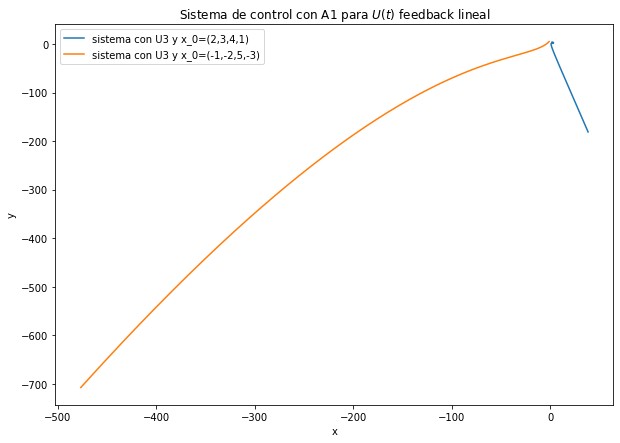

In [ ]:
plt.figure(figsize=(10,7))  
t = np.linspace(0, 4, 300) # definir tiempo

# Resolución y grafico para U3 tipo feedback, x0 = x0_1
sol1 = sp.integrate.solve_ivp(sistema3, t_span=[0, 1], y0=x0_1, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U3 y x_0=(2,3,4,1)')

# Resolución y grafico para U2 tipo feedback, x0 = x0_2
sol1 = sp.integrate.solve_ivp(sistema3, t_span=[0, 1], y0=x0_2, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U3 y x_0=(-1,-2,5,-3)')

# Propiedades del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(r'Sistema de control con A1 para $U(t)$ feedback lineal')
plt.show()

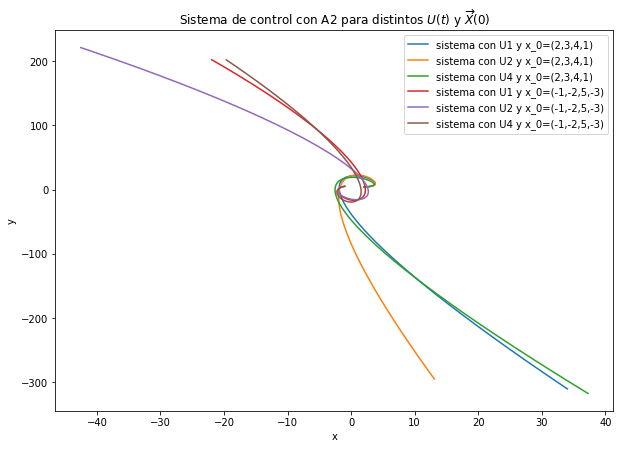

In [ ]:
plt.figure(figsize=(10,7))  
# Resolución y grafico para U1 con valores constantes, x0 = x0_1
sol1 = sp.integrate.solve_ivp(sistema5, t_span=[0, 2], y0=x0_1, dense_output=True)
t = np.linspace(0, 6, 300) #definir tiempo
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U1 y x_0=(2,3,4,1)')

# Resolución y grafico para U2 con valores sinusoidales, x0 = x0_1
sol1 = sp.integrate.solve_ivp(sistema6, t_span=[0, 2], y0=x0_1, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U2 y x_0=(2,3,4,1)')

# Resolución y grafico para U2 tipo bang-bang, x0 = x0_1
sol1 = sp.integrate.solve_ivp(sistema8, t_span=[0, 2], y0=x0_1, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U4 y x_0=(2,3,4,1)')


# ------------------------------ cambio de condiciones iniciales------------------------------ #


# Resolución y grafico para U1 con valores constantes, x0 = x0_2
sol1 = sp.integrate.solve_ivp(sistema5, t_span=[0, 2], y0=x0_2, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U1 y x_0=(-1,-2,5,-3)')

# Resolución y grafico para U2 con valores sinusoidales, x0 = x0_2
sol1 = sp.integrate.solve_ivp(sistema6, t_span=[0, 2], y0=x0_2, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U2 y x_0=(-1,-2,5,-3)')

# Resolución y grafico para U2 tipo bang-bang, x0 = x0_2
sol1 = sp.integrate.solve_ivp(sistema8, t_span=[0, 2], y0=x0_2, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U4 y x_0=(-1,-2,5,-3)')


# Propiedades del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(r'Sistema de control con A2 para distintos $U(t)$ y $\overrightarrow{X}(0)$')
plt.show()

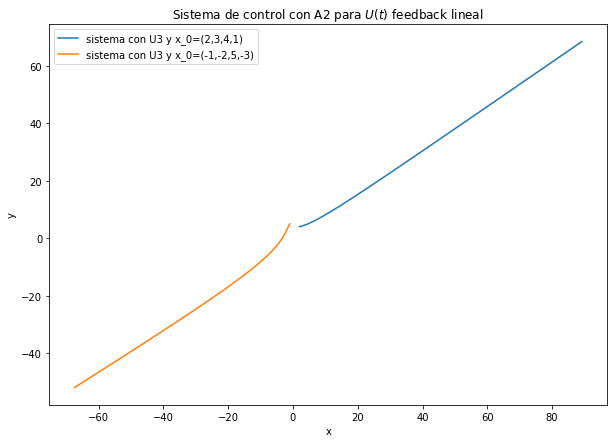

In [ ]:
plt.figure(figsize=(10,7))  
t = np.linspace(0, 2, 300) # definir tiempo

# Resolución y grafico para U3 tipo feedback, x0 = x0_1
sol1 = sp.integrate.solve_ivp(sistema7, t_span=[0, 1], y0=x0_1, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U3 y x_0=(2,3,4,1)')

# Resolución y grafico para U2 tipo feedback, x0 = x0_2
sol1 = sp.integrate.solve_ivp(sistema7, t_span=[0, 1], y0=x0_2, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U3 y x_0=(-1,-2,5,-3)')

# Propiedades del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(r'Sistema de control con A2 para $U(t)$ feedback lineal')
plt.show()

Luego, se grafican estos últimos sistemas con la matriz $A2$ pero con mayor tiempo para observar el comportamiento a largo plazo del sistema.

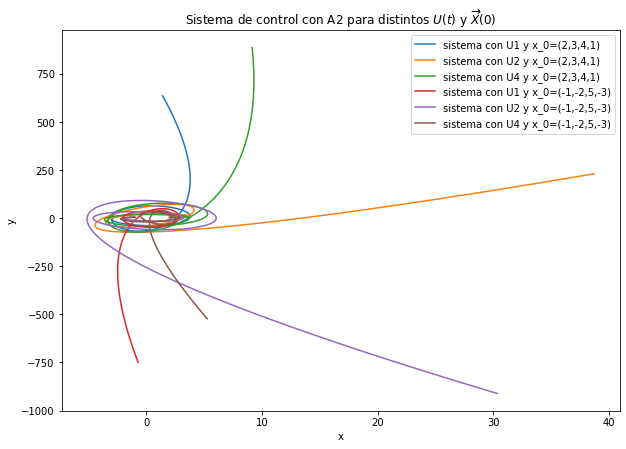

In [ ]:
plt.figure(figsize=(10,7))  
# Resolución y grafico para U1 con valores constantes, x0 = x0_1
sol1 = sp.integrate.solve_ivp(sistema5, t_span=[0, 10], y0=x0_1, dense_output=True)
t = np.linspace(0, 14, 300) # definir tiempo
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U1 y x_0=(2,3,4,1)')

# Resolución y grafico para U2 con valores sinusoidales, x0 = x0_1
sol1 = sp.integrate.solve_ivp(sistema6, t_span=[0, 10], y0=x0_1, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U2 y x_0=(2,3,4,1)')

# Resolución y grafico para U2 tipo bang-bang, x0 = x0_1
sol1 = sp.integrate.solve_ivp(sistema8, t_span=[0, 10], y0=x0_1, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U4 y x_0=(2,3,4,1)')


# ------------------------------ cambio de condiciones iniciales------------------------------ #


# Resolución y grafico para U1 con valores constantes, x0 = x0_2
sol1 = sp.integrate.solve_ivp(sistema5, t_span=[0, 10], y0=x0_2, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U1 y x_0=(-1,-2,5,-3)')

# Resolución y grafico para U2 con valores sinusoidales, x0 = x0_2
sol1 = sp.integrate.solve_ivp(sistema6, t_span=[0, 10], y0=x0_2, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U2 y x_0=(-1,-2,5,-3)')

# Resolución y grafico para U2 tipo bang-bang, x0 = x0_2
sol1 = sp.integrate.solve_ivp(sistema8, t_span=[0, 10], y0=x0_2, dense_output=True)
z = sol1.sol(t)
plt.plot(z[0], z[2], label='sistema con U4 y x_0=(-1,-2,5,-3)')


# Propiedades del gráfico
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title(r'Sistema de control con A2 para distintos $U(t)$ y $\overrightarrow{X}(0)$')
plt.show()

#Ejercicio 4

In [ ]:
# Función que calcula la matriz de controlabilidad usando Kalman
def calcularKalman(a,b,c,d):
  #A
  A=np.array([[0,1,0,0],[a,0,b,0],[0,0,0,1],[c, 0, d,0]]) 
  #B
  B=np.array([[0,0],[1,0],[0,0],[0,1]])
  aux1=np.concatenate((B, np.matmul(A,B)), axis=1)
  aux2=np.concatenate((aux1,np.matmul(A,np.matmul(A,B))), axis=1)
  C= np.concatenate((aux2,np.matmul(A,np.matmul(A,np.matmul(A,B)))), axis=1)
  return C

print(calcularKalman(-1,-2,4,-5))
# Primeros parámetros
a=-1
b=-2
c=4
d=-5
# Comparación usando ctrb
print(ctrb(A=np.array([[0,1,0,0],[a,0,b,0],[0,0,0,1],[c, 0, d,0]]), B=np.array([[0,0],[1,0],[0,0],[0,1]])))

print()
print(calcularKalman(-1,0,4,-1))
# Cambio de a, b, c, d
a=-1
b=0
c=4
d=-1
# Comparación usando ctrb
print(ctrb(A=np.array([[0,1,0,0],[a,0,b,0],[0,0,0,1],[c, 0, d,0]]), B=np.array([[0,0],[1,0],[0,0],[0,1]])))

[[ 0  0  1  0  0  0 -1 -2]
 [ 1  0  0  0 -1 -2  0  0]
 [ 0  0  0  1  0  0  4 -5]
 [ 0  1  0  0  4 -5  0  0]]
[[ 0.  0.  1.  0.  0.  0. -1. -2.]
 [ 1.  0.  0.  0. -1. -2.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  4. -5.]
 [ 0.  1.  0.  0.  4. -5.  0.  0.]]

[[ 0  0  1  0  0  0 -1  0]
 [ 1  0  0  0 -1  0  0  0]
 [ 0  0  0  1  0  0  4 -1]
 [ 0  1  0  0  4 -1  0  0]]
[[ 0.  0.  1.  0.  0.  0. -1.  0.]
 [ 1.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  4. -1.]
 [ 0.  1.  0.  0.  4. -1.  0.  0.]]


Funciona! Ambos sistemas con controlables pues ambas matrices tienen rango completo, las primeras 4 columnas son una base canónica de $\mathbb{R}^4$

# Ejercicio 5

In [ ]:
# Función que cacula la matriz de observabilidad 
def calcularMatrizObs(a,b,c,d):
  #A
  A=np.array([[0,1,0,0],[a,0,b,0],[0,0,0,1],[c, 0, d,0]]) 
  #C
  C=np.array([[1,0,0,0],[0,0,1,0]])
  aux1=np.concatenate((C, np.matmul(C,A)), axis=0)
  aux2=np.concatenate((aux1,np.matmul(C,np.matmul(A,A))), axis=0)
  Obs = np.concatenate((aux2,np.matmul(C,np.matmul(A,np.matmul(A,A)))), axis=0)
  return Obs

# Primer ejemplo
a=-1
b=-2
c=4
d=-5
print(calcularMatrizObs(a,b,c,d))
# Comparación usando ctrb
print(obsv(A=np.array([[0,1,0,0],[a,0,b,0],[0,0,0,1],[c, 0, d,0]]), C=np.array([[1,0,0,0],[0,0,1,0]])))

print()
# Segundo ejemplo 
a=-1
b=0
c=4
d=-1
#Comparación usando ctrb
print(calcularMatrizObs(a,b,c,d))
print(obsv(A=np.array([[0,1,0,0],[a,0,b,0],[0,0,0,1],[c, 0, d,0]]), C=np.array([[1,0,0,0],[0,0,1,0]])))

[[ 1  0  0  0]
 [ 0  0  1  0]
 [ 0  1  0  0]
 [ 0  0  0  1]
 [-1  0 -2  0]
 [ 4  0 -5  0]
 [ 0 -1  0 -2]
 [ 0  4  0 -5]]
[[ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [-1.  0. -2.  0.]
 [ 4.  0. -5.  0.]
 [ 0. -1.  0. -2.]
 [ 0.  4.  0. -5.]]

[[ 1  0  0  0]
 [ 0  0  1  0]
 [ 0  1  0  0]
 [ 0  0  0  1]
 [-1  0  0  0]
 [ 4  0 -1  0]
 [ 0 -1  0  0]
 [ 0  4  0 -1]]
[[ 1.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]
 [-1.  0.  0.  0.]
 [ 4.  0. -1.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  4.  0. -1.]]


#Ejercicio 6

In [ ]:
# Cálculo de Grammiano con a, b, c, d = -1, -2, 4, -5
a=-1
b=-2
c=4
d=-5
# Definición de matrices
A=np.array([[0,1,0,0],[a,0,b,0],[0,0,0,1],[c, 0, d,0]]) 
B=np.array([[0,0],[1,0],[0,0],[0,1]])
C=np.array([[1,0,0,0],[0,0,1,0]])
D=np.array([[0,0],[0,0]])
# Grammiano
sys=StateSpace(A, B, C, D)
print(gram(sys,'c'))

ValueError: ignored

In [ ]:
# Cálculo de Grammiano con a, b, c, d = -1, 0, 4, -1
a=-1
b=0
c=4
d=-1
# Definición de matrices
A=np.array([[0,1,0,0],[a,0,b,0],[0,0,0,1],[c, 0, d,0]]) 
B=np.array([[0,0],[1,0],[0,0],[0,1]])
C=np.array([[1,0,0,0],[0,0,1,0]])
D=np.array([[0,0],[0,0]])
sys=StateSpace(A, B, C, D)
# Grammiano
print(gram(sys,'c'))

ValueError: ignored

Se obtiene que ambos sistemas son inestables, esto quiere decir que la solución tiende a diverger para las mareas dadas.

#Ejercicio 7

In [6]:
# Definición de K1 y K2 para que las matrices A1-BK1 y A2-BK2 sean Hurwitz respectivamente
K1 = place(A1, B, [-11, -21, -69, -420])
print('K1=',K1)
K2 = place(A2, B, [-11, -21, -69, -420])
print('\n')
print('K2=',K2)

K1= [[5251.4996611   281.23479606 4001.81966829  179.30513056]
 [4007.81707767  179.30506579 4321.50033889  239.76520394]]


K2= [[5251.4996611   281.23479606 4003.81966829  179.30513056]
 [4007.81707767  179.30506579 4325.50033889  239.76520394]]


In [ ]:
# Parámetros a usar en el comando lqr
Q = np.eye(4)
R = np.eye(2)
# N=0
# Cálculo de K3 y K4
K3, S1, E1 = lqr(A1, B, Q, R)
K4, S2, E2 = lqr(A2, B, Q, R)
# Valores y vectores propios de A2-BK2
print(np.linalg.eig(A1-np.matmul(B,K3)))
print('\n')
# Valores y vectores propios de A2-BK2
np.linalg.eig(A2-np.matmul(B,K4))

(array([-0.84485072+2.15812617j, -0.84485072-2.15812617j,
       -0.91649959+1.37703873j, -0.91649959-1.37703873j]), array([[-0.13891362+0.06236078j, -0.13891362-0.06236078j,
        -0.23249984-0.34933053j, -0.23249984+0.34933053j],
       [-0.01722116-0.35247866j, -0.01722116+0.35247866j,
         0.69412769+0.j        ,  0.69412769-0.j        ],
       [-0.13332692-0.34057653j, -0.13332692+0.34057653j,
        -0.01324684-0.30230388j, -0.01324684+0.30230388j],
       [ 0.84764847+0.j        ,  0.84764847-0.j        ,
         0.42842487+0.25881996j,  0.42842487-0.25881996j]]))




(array([-0.79983234+1.6061606j , -0.79983234-1.6061606j ,
        -1.07914433+0.47384847j, -1.07914433-0.47384847j]),
 array([[-0.06991544+0.27632857j, -0.06991544-0.27632857j,
          0.27014997+0.02280051j,  0.27014997-0.02280051j],
        [-0.38790742-0.33331195j, -0.38790742+0.33331195j,
         -0.30233479+0.10340511j, -0.30233479-0.10340511j],
        [-0.17592199-0.35327275j, -0.17592199+0.35327275j,
          0.53785895+0.23617197j,  0.53785895-0.23617197j],
        [ 0.70812086+0.j        ,  0.70812086-0.j        ,
         -0.69233716+0.j        , -0.69233716-0.j        ]]))

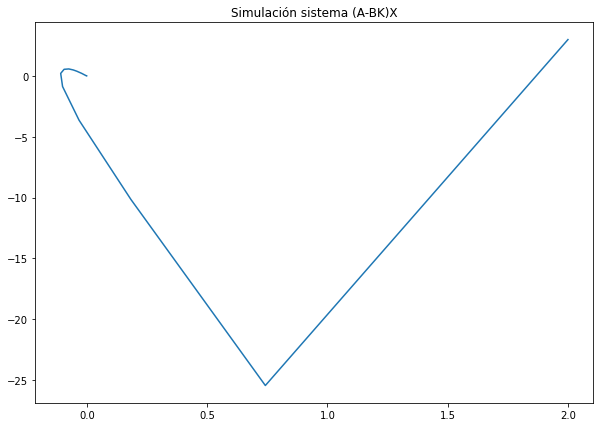

In [ ]:
# Simulación de trayectoria para U=-BK1 
def sist(t,x):
  return np.matmul(A1 - np.matmul(B,K1),x)

t = np.linspace(0, 10, 300) # definir tiempo
plt.figure(figsize=(10,7))  
sol1 = sp.integrate.solve_ivp(sist, t_span=[0, 10], y0=x0_1, dense_output=True) #solución
z = sol1.sol(t)
plt.plot(z[0], z[1], label='sistema (A-BK)X') #gráfico
plt.title(r'Simulación sistema (A-BK)X')
plt.show()

In [ ]:
# Calcular L que sirve para el ejercicio 9:

# Mismo código para encontrar K pero esta vez buscando una matriz L tal que A-LC sea Hurwitz
C=np.array([[1,0,0,0], [0,0,1,0]])
# Definición de matrices para el comando lqr
Q = np.eye(4)
R = np.eye(2)
# N=0
# Cálculo de L1 y L2 asciados a A1 y A2 respectivamente
L1, S1, E1 = lqr(A1.T, C.T, Q, R)
L2, S2, E2 = lqr(A2.T, C.T, Q, R)
# Valores y vectores propios de A1-L1C y A2-L2C
print('Valores y vectores propios de A1-L1C:')
print(np.linalg.eig(A1-np.matmul(L1.T,C)))
print('\n')
print('Valores y vectores propios de A2-L2C:')
np.linalg.eig(A2-np.matmul(L2.T,C))

Valores y vectores propios de A1-L1C:
(array([-0.84485072+2.15812617j, -0.84485072-2.15812617j,
       -0.91649959+1.37703873j, -0.91649959-1.37703873j]), array([[0.16663583+0.0148765j , 0.16663583-0.0148765j ,
        0.27362394-0.32138937j, 0.27362394+0.32138937j],
       [0.20268279+0.1578065j , 0.20268279-0.1578065j ,
        0.65638613+0.j        , 0.65638613-0.j        ],
       [0.13244029-0.29771359j, 0.13244029+0.29771359j,
        0.00612559-0.18177267j, 0.00612559+0.18177267j],
       [0.89434567+0.j        , 0.89434567-0.j        ,
        0.45289883-0.39089626j, 0.45289883+0.39089626j]]))


Valores y vectores propios de A2-L2C:


(array([-0.79983234+1.6061606j , -0.79983234-1.6061606j ,
        -1.07914433+0.47384847j, -1.07914433-0.47384847j]),
 array([[ 0.09863577+0.20921501j,  0.09863577-0.20921501j,
          0.35527275-0.036067j  ,  0.35527275+0.036067j  ],
        [-0.18546221+0.11791774j, -0.18546221-0.11791774j,
          0.25251577+0.1085803j ,  0.25251577-0.1085803j ],
        [ 0.2297385 -0.26931806j,  0.2297385 +0.26931806j,
          0.39086483-0.11508276j,  0.39086483+0.11508276j],
        [ 0.87914006+0.j        ,  0.87914006-0.j        ,
          0.79429666+0.j        ,  0.79429666-0.j        ]]))

#Ejercicio 8



$\overrightarrow{Y}=\pmatrix{x1\\x_3}=\pmatrix{1&0&0&0\\0&0&1&0}\pmatrix{x_1\\ x_2\\ x_3 \\x_4}=C\overrightarrow{X}$

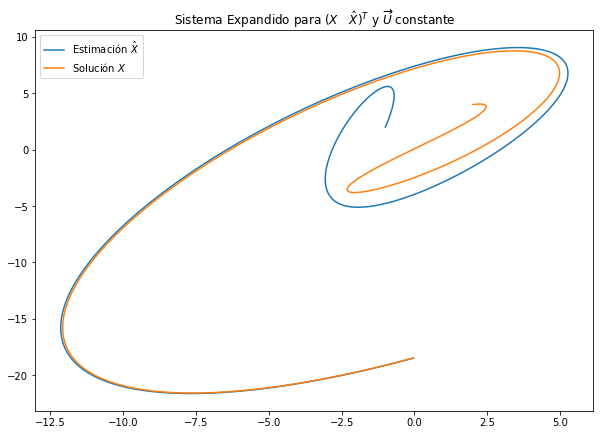

In [7]:
# Definición expandida para un sistema (X  hat{X})

# Definición de los mismos parámetros anteriores
B=np.array([[0,0],[1,0],[0,0],[0,1]])
a1,b1,c1,d1 = -1,-2,4,-5
m=1
A1=np.array([[0,1,0,0],[a1/m,0,b1/m,0],[0,0,0,1],[c1/m, 0, d1/m,0]])
C=np.array([[1,0,0,0], [0,0,1,0]])
Q = np.eye(4)
R = np.eye(2)
L1, S1, E1 = lqr(A1.T, C.T, Q, R)

# Sistema que tiene como variable un x = (X hat{X}) donde x es un vector de 8 dimensiones
# El control usado en este sistema es U1(t) = vector constante
def sistemaExpandido(t,x):
  # Definición del sistema por bloques
  m1=np.concatenate((A1,np.matmul(L1.T,C)), axis=0)
  m2=np.concatenate((np.zeros((4,4)),A1-np.matmul(L1.T,C)), axis=0)
  AA=np.concatenate((m1,m2), axis=1)
  RR=np.concatenate((np.matmul(B,U1(t)),np.matmul(B,U1(t))),axis=0)
  return np.matmul(AA,x)+RR

t = np.linspace(0, 6, 300) # definir tiempo
x0=np.array([2,3,4,1,-1,-4,2,9]) # Condición inicial
plt.figure(figsize=(10,7))  # gráfico
sol1 = sp.integrate.solve_ivp(sistemaExpandido, t_span=[0, 10], y0=x0, dense_output=True) # solución
z = sol1.sol(t)
plt.plot(z[4], z[6], label=r'Estimación $\hat{X}$')
plt.plot(z[0], z[2], label=r'Solución $X$')
plt.title(r'Sistema Expandido para ($X \quad \hat{X})^T$ y $\overrightarrow{U}$ constante')
plt.legend()
plt.show()

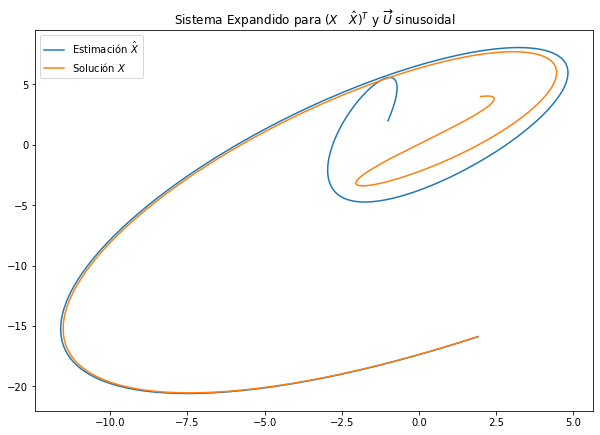

In [ ]:
# Sistema con la misma construcción que antes
# El control usado en este sistema es U2(t) = sinusoidal (sin(t))
def sistemaExpandido2(t,x):
  m1=np.concatenate((A1,np.matmul(L1.T,C)), axis=0)
  m2=np.concatenate((np.zeros((4,4)),A1-np.matmul(L1.T,C)), axis=0)
  AA=np.concatenate((m1,m2), axis=1)
  RR=np.concatenate((np.matmul(B,U2(t)),np.matmul(B,U2(t))),axis=0)
  return np.matmul(AA,x)+RR

t = np.linspace(0, 6, 300)
x0=np.array([2,3,4,1,-1,-4,2,9])
plt.figure(figsize=(10,7))  
sol1 = sp.integrate.solve_ivp(sistemaExpandido2, t_span=[0, 10], y0=x0, dense_output=True)
z = sol1.sol(t)
plt.plot(z[4], z[6], label=r'Estimación $\hat{X}$')
plt.plot(z[0], z[2], label=r'Solución $X$')
plt.title(r'Sistema Expandido para ($X \quad \hat{X})^T$ y $\overrightarrow{U}$ sinusoidal')
plt.legend()
plt.show()

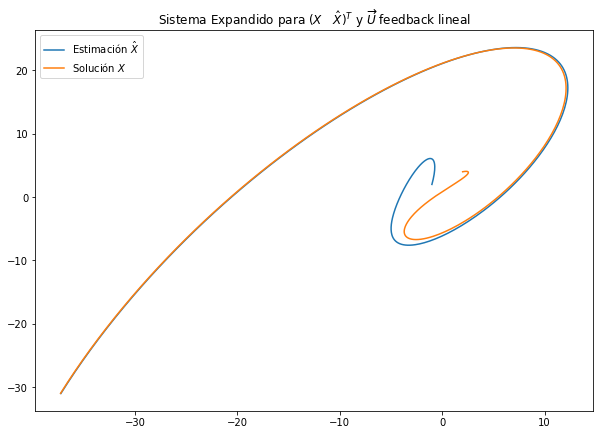

In [ ]:
# Sistema con la misma construcción que antes
# El control usado en este sistema es U3(t) = feedback lineal
def sistemaExpandido3(t,x):
  m1=np.concatenate((A1+np.matmul(B,C),np.matmul(L1.T,C)), axis=0)
  m2=np.concatenate((np.zeros((4,4)),A1-np.matmul(L1.T,C)+np.matmul(B,C)), axis=0)
  AA=np.concatenate((m1,m2), axis=1)
  return np.matmul(AA,x)

t = np.linspace(0, 6, 300)
x0=np.array([2,3,4,1,-1,-4,2,9])
plt.figure(figsize=(10,7))  
sol1 = sp.integrate.solve_ivp(sistemaExpandido3, t_span=[0, 10], y0=x0, dense_output=True)
z = sol1.sol(t)
plt.plot(z[4], z[6], label=r'Estimación $\hat{X}$')
plt.plot(z[0], z[2], label=r'Solución $X$')
plt.title(r'Sistema Expandido para ($X \quad \hat{X})^T$ y $\overrightarrow{U}$ feedback lineal')
plt.legend()
plt.show()

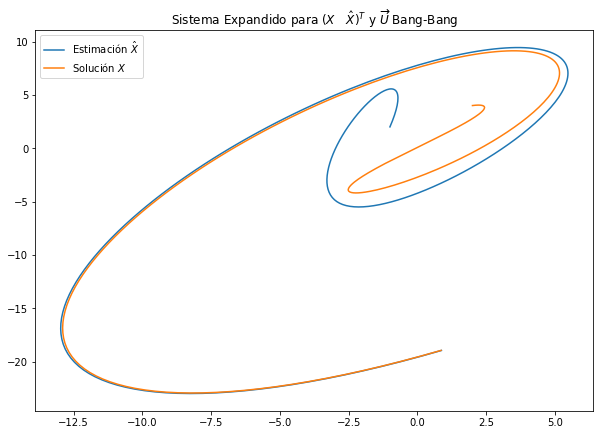

In [ ]:
# Sistema con la misma construcción que antes
# El control usado en este sistema es U4(t) = Bang-Bang
def sistemaExpandido4(t,x):
  m1=np.concatenate((A1,np.matmul(L1.T,C)), axis=0)
  m2=np.concatenate((np.zeros((4,4)),A1-np.matmul(L1.T,C)), axis=0)
  AA=np.concatenate((m1,m2), axis=1)
  RR=np.concatenate((np.matmul(B,U4(t)),np.matmul(B,U4(t))),axis=0)
  return np.matmul(AA,x)+RR

t = np.linspace(0, 6, 300)
x0=np.array([2,3,4,1,-1,-4,2,9])
plt.figure(figsize=(10,7))  
sol1 = sp.integrate.solve_ivp(sistemaExpandido4, t_span=[0, 10], y0=x0, dense_output=True)
z = sol1.sol(t)
plt.plot(z[4], z[6], label=r'Estimación $\hat{X}$')
plt.plot(z[0], z[2], label=r'Solución $X$')
plt.title(r'Sistema Expandido para ($X \quad \hat{X})^T$ y $\overrightarrow{U}$ Bang-Bang')
plt.legend()
plt.show()

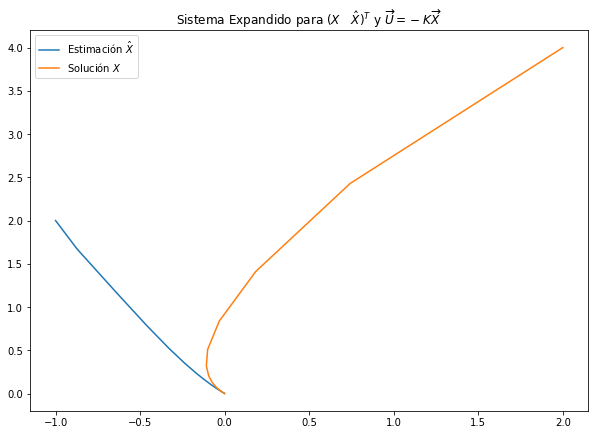

In [ ]:
# K1 tal que A-BK1 Hurwitz
K1 = place(A1, B, [-11, -21, -69, -420])

# Sistema con la misma construcción que antes
# El control usado en este sistema es U(t) = -K1X

def sistemaExpandido5(t,x):
  m1=np.concatenate((A1+np.matmul(B,-K1),np.matmul(L1.T,C)), axis=0)
  m2=np.concatenate((np.zeros((4,4)),A1-np.matmul(L1.T,C)+np.matmul(B,-K1)), axis=0)
  AA=np.concatenate((m1,m2), axis=1)
  return np.matmul(AA,x)

t = np.linspace(0, 10, 300)
x0=np.array([2,3,4,1,-1,-4,2,9])
plt.figure(figsize=(10,7))  
sol1 = sp.integrate.solve_ivp(sistemaExpandido5, t_span=[0, 10], y0=x0, dense_output=True)
z = sol1.sol(t)
plt.plot(z[4], z[6], label=r'Estimación $\hat{X}$')
plt.plot(z[0], z[2], label=r'Solución $X$')
plt.title(r'Sistema Expandido para ($X \quad \hat{X})^T$ y $\overrightarrow{U} = -K\overrightarrow{X}$')
plt.legend()
plt.show()

A continuación se mostrará un ejemplo con un control $U=DX$ feedback lineal pero que no haga la matriz $A-BD$ Hurwitz.

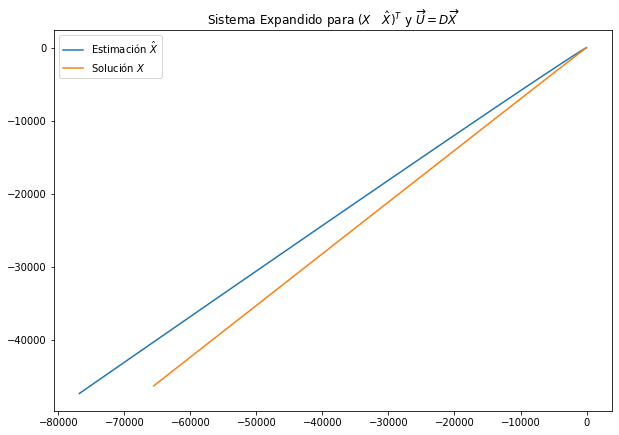

In [ ]:
D = [[1,1,1,1],[1,0,-1,0]] # Misma matriz que el ejercicio 3

# Sistema con la misma construcción que antes
# El control usado en este sistema es U(t) = DX (A-BD NO HURWITZ)
def sistemaExpandido6(t,x):
  m1=np.concatenate((A1+np.matmul(B,D),np.matmul(L1.T,C)), axis=0)
  m2=np.concatenate((np.zeros((4,4)),A1-np.matmul(L1.T,C)+np.matmul(B,D)), axis=0)
  AA=np.concatenate((m1,m2), axis=1)
  return np.matmul(AA,x)

t = np.linspace(0, 10, 300)
x0=np.array([2,3,4,1,-1,-4,2,9])
plt.figure(figsize=(10,7))  
sol1 = sp.integrate.solve_ivp(sistemaExpandido6, t_span=[0, 10], y0=x0, dense_output=True)
z = sol1.sol(t)
plt.plot(z[4], z[6], label=r'Estimación $\hat{X}$')
plt.plot(z[0], z[2], label=r'Solución $X$')
plt.title(r'Sistema Expandido para ($X \quad \hat{X})^T$ y $\overrightarrow{U} = D\overrightarrow{X}$')
plt.legend()
plt.show()

#Ejercicio 9

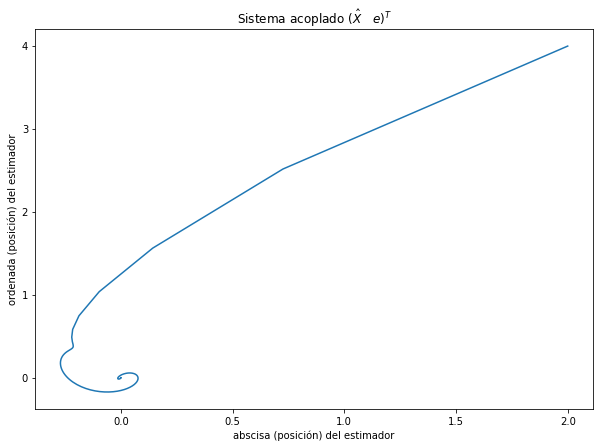

In [10]:
# Sistema definido por bloques con x = (hat{X} e) y matriz hat{A} apropiada
def sistemaej9(t,x):
  M1=A1-np.matmul(B,K1)
  M2=A1-np.matmul(L1.T,C)
  M3=np.concatenate((M1,np.matmul(L1.T,C)), axis=1)
  M4=np.concatenate((np.zeros((4,4)),M2), axis=1)
  M5=np.concatenate((M3,M4), axis=0) # hat{A}
  return np.matmul(M5,x)

t = np.linspace(0, 10, 300) # definir tiempo
x0=np.array([2,3,4,1,-1,-4,2,9]) # condición inicial
plt.figure(figsize=(10,7))  
sol1 = sp.integrate.solve_ivp(sistemaej9, t_span=[0, 10], y0=x0, dense_output=True) # solución
z = sol1.sol(t)
plt.plot(z[0], z[2]) # gráfico
plt.title(r'Sistema acoplado $(\hat{X} \quad e)^T$')
plt.xlabel("abscisa (posición) del estimador")
plt.ylabel("ordenada (posición) del estimador")
plt.show()

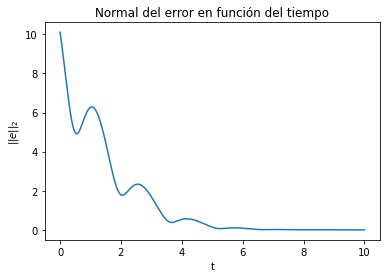

In [9]:
plt.plot(t, np.sqrt(z[4]**2+z[5]**2+z[6]**2+z[7]**2)) # gráfico
plt.title(r'Norma del error en función del tiempo')
plt.xlabel("t")
plt.ylabel("$||e||_2$")
plt.show()